# Assignment #2 - Classification

<font color="red"> <b> Due: Feb 26 (Monday) 11:00 pm </b> </font>

<font color="blue"> Yangqi Su </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

In [561]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
%matplotlib inline


In the first part, I will filter the players based on their preference of field positions to determine whether the prefer attack or defense. The final filtered dataframe will contain a column named preference of binary values where 1 means prefering to attack and 0 means preferring to defend

In [349]:
fifa=pd.read_csv("./fifa18players.csv", sep=",", header=0)
total_features=["sho","def","pac","pas","dri","phy","short_passing","dribbling","long_passing","ball_control","acceleration",
                "sprint_speed","agility","reactions","balance","jumping",
                "stamina","strength","aggression",
                "positioning","vision", "prefers_gk","prefers_rs","prefers_rw","prefers_rf","prefers_st",
                "prefers_lw","prefers_cf","prefers_ls","prefers_lf", "prefers_rs","prefers_rw",
                "prefers_rf","prefers_st","prefers_lw","prefers_cf","prefers_ls","prefers_lf",
                "prefers_lam", "prefers_cam","prefers_ram","prefers_rm","prefers_rcm","prefers_cm",
                "prefers_lm","prefers_lcm"]

fifa=fifa[total_features]


AttOrDef=fifa[["prefers_rm","prefers_rcm","prefers_cm","prefers_lm","prefers_lcm","prefers_gk"]].any(axis=1) != True
Attack=["prefers_rs","prefers_rw","prefers_rf","prefers_st","prefers_lw","prefers_cf","prefers_ls","prefers_lf", "prefers_lam", "prefers_cam","prefers_ram"]
fifa=fifa.drop(["prefers_rm","prefers_rcm","prefers_cm","prefers_lm","prefers_lcm","prefers_gk"], axis=1)
fifa=fifa[AttOrDef]
fifa['preference']=np.where(np.sum(fifa[Attack].values, axis=1) > 0, 1, 0)
fifa=fifa.drop(Attack, axis=1).reset_index()
fifa=fifa.drop(['index'], axis=1)
fifa.head(n=5)


,sho,def,pac,pas,dri,phy,short_passing,dribbling,long_passing,ball_control,...,agility,reactions,balance,jumping,stamina,strength,aggression,positioning,vision,preference
0,93,33,90,82,90,80,83,91,77,93,...,89,96,63,95,92,80,63,95,85,1
1,90,26,89,86,96,61,88,97,87,95,...,90,95,95,68,73,59,48,93,90,1
2,84,30,92,79,95,60,81,96,75,95,...,96,88,82,61,78,53,56,90,80,1
3,90,42,82,79,87,81,83,86,64,91,...,86,93,60,69,89,80,78,92,84,1
4,88,38,81,75,86,82,83,85,65,89,...,78,91,80,84,79,84,80,91,78,1


Next I perform a PCA on the data excluding the preference column to see how the data varies.

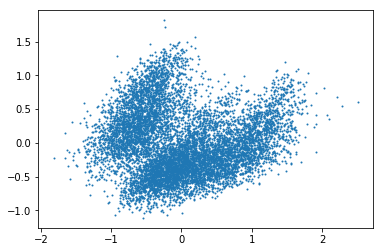

In [359]:
from sklearn.decomposition import PCA
features=fifa.drop('preference', axis=1)
pca=PCA(n_components=2)
test=(features.values-np.mean(features.values, axis=0))/np.std(features.values, axis=0)
pc=pca.fit_transform(np.log(features-np.min(test)+1))
plt.scatter(pc[:,0],pc[:,1], s=1)

The red below represents players who prefer Attacking and the blue represents players who prefer Defending

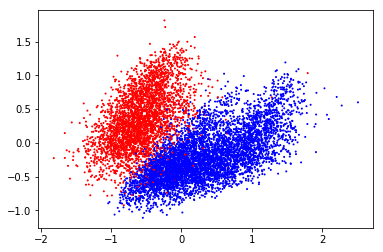

In [457]:
att=fifa.index[fifa["preference"]==1].tolist()
COLOR=['b' for i in range(pc.shape[0])]
for i in att:
    COLOR[i]='r'
plt.scatter(pc[:,0],pc[:,1], c=COLOR, s=1)

Then, I plotted the features against the preferences to get a overview of which features are significant. This step was performed because I want to also pick 2 features that seem unrelated to a players preference to predict a players preference on the field. (features such as "sho" or "def", which stand for shooting and defense naturally convey a players purpose on the field)

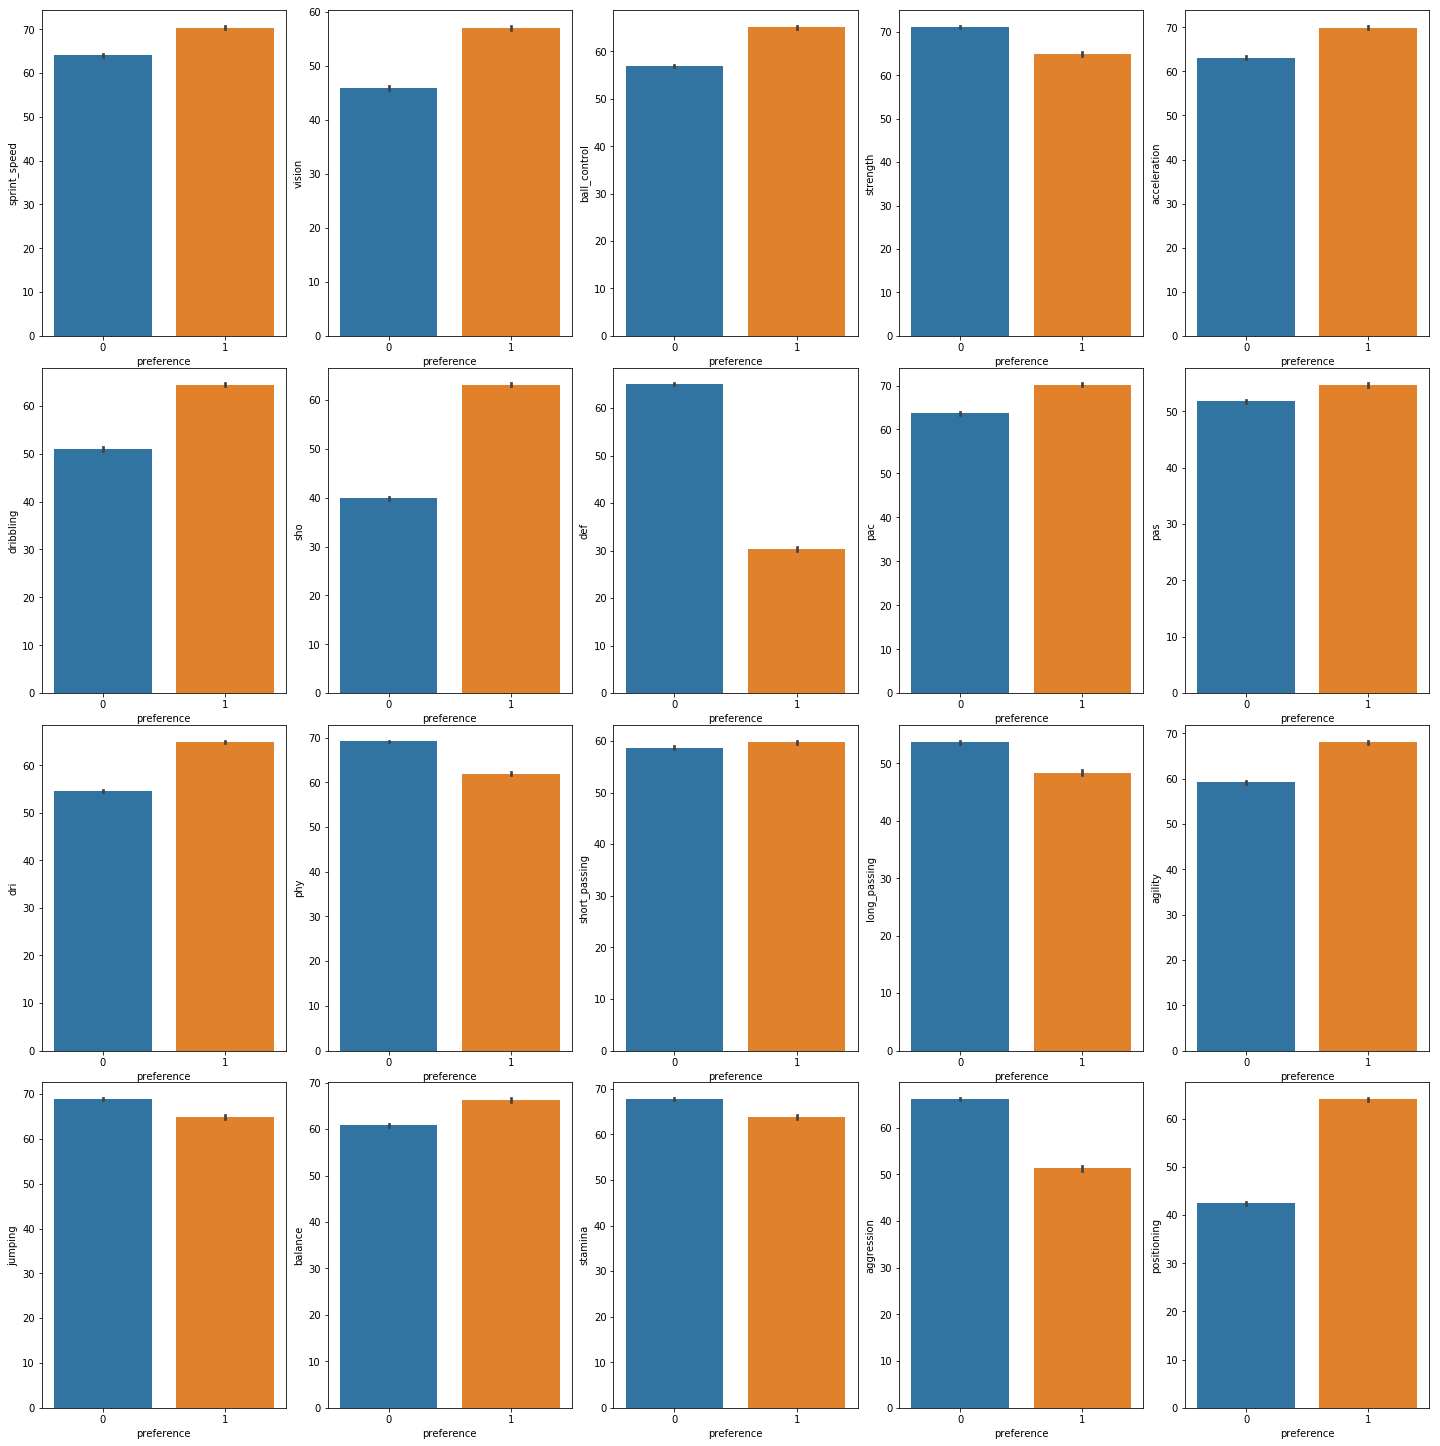

In [319]:
fig, ax =plt.subplots(4,5, figsize=(20,20))
fig.tight_layout()
sns.barplot(y='sprint_speed', x='preference', data=fifa, ax=ax[0][0])
sns.barplot(y='vision', x='preference', data=fifa,ax=ax[0][1])
sns.barplot(y='ball_control', x='preference', data=fifa,ax=ax[0][2])
sns.barplot(y='strength', x='preference', data=fifa, ax=ax[0][3])
sns.barplot(y='acceleration', x='preference', data=fifa,ax=ax[0][4])
sns.barplot(y='dribbling', x='preference', data=fifa,ax=ax[1][0])
sns.barplot(y="sho", x='preference', data=fifa, ax=ax[1][1])
sns.barplot(y="def", x='preference', data=fifa,ax=ax[1][2])
sns.barplot(y="pac", x='preference', data=fifa,ax=ax[1][3])
sns.barplot(y="pas", x='preference', data=fifa, ax=ax[1][4])
sns.barplot(y="dri", x='preference', data=fifa,ax=ax[2][0])
sns.barplot(y="phy", x='preference', data=fifa,ax=ax[2][1])
sns.barplot(y="short_passing", x='preference', data=fifa, ax=ax[2][2])
sns.barplot(y="long_passing", x='preference', data=fifa,ax=ax[2][3])
sns.barplot(y="agility", x='preference', data=fifa,ax=ax[2][4])
sns.barplot(y="jumping", x='preference', data=fifa, ax=ax[3][0])
sns.barplot(y="balance", x='preference', data=fifa,ax=ax[3][1])
sns.barplot(y="stamina", x='preference', data=fifa,ax=ax[3][2])
sns.barplot(y="aggression", x='preference', data=fifa,ax=ax[3][3])
sns.barplot(y="positioning", x='preference', data=fifa,ax=ax[3][4])

It is obvious to see that the features "sho" and "def" are the most significant features that determine preference. However, as "sho", which stands for shooting and "def" which stands for defense naturally convey a players main purpose on the field, we will try to use some other features. For this experiment I chose, "positioning" and "aggression as the two features.

In [361]:
fifa_2f = fifa[["positioning", "aggression"]]
fifa_2f.head()

,positioning,aggression
0,95,63
1,93,48
2,90,56
3,92,78
4,91,80


# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


In [543]:
import numpy as np
import abc
from abc import ABC, abstractmethod
from copy import deepcopy as copy
from sklearn.metrics import roc_curve, auc

### Misc Functions

**plot_roc** plots out roc_auc curves based on fpr and tpr vectors

In [513]:
def plot_roc(fpr, tpr):
    roc_auc=auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show() # Code from sklearn tutorial for plotting of auc roc curves

**rmse** calculates the residual mean squared error for the predicted values

In [544]:
def rmse(T, Y): 
    return np.sqrt(np.mean((T-Y)**2))

**confusion_matrix** returns the confusion matrix for the prediction and target (Function for making the confusion matrix associated with the predictions; This was copied over from the Classification Notes since its is the most efficient way I can think of also).

In [556]:

def confusion_matrix(Y, T):
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

**plot_confusion_matrix** function is from [1]

In [586]:
def plot_confusion_matrix(cm, classes=["defense", "attack"],
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

**evaluation_metrics** outputs the relevant evaulation metrics of the model and a confusion matrix plot

In [563]:
def evaluation_metrics(Y, T):
    cfm=confusion_matrix(Y=Y, T=T).values
    fpr=cfm[1,0]/(cfm[0,0]+cfm[1,0])
    precision=cfm[1,1]/(cfm[1,1]+cfm[1,0])
    recall=cfm[1,1]/(cfm[1,1]+cfm[0,1])
    specificity=cfm[0,1]/(cfm[0,1]+cfm[1,0])
    plot_confusion_matrix(cfm)
    F1=2*precision*recall/(precision+recall)
    MCC=(cfm[1,1]*cfm[0,0]-cfm[1,0]*cfm[0,1])/np.sqrt((cfm[1,1]+cfm[1,0])*(cfm[1,1]+cfm[0,1])*(cfm[0,1]+cfm[1,0])*(cfm[0,1]+cfm[0,0]))
    print("Precision:\t" + str(precision) )
    print("Recall:\t" + str(recall) )
    print("Specificity:\t" + str(specificity) )
    print("FPR:\t" + str(fpr) +"\n")
    print("F1 Score:\t" + str(F1) )
    print("MCC Score:\t" + str(MCC) )

**OneHot** transforms a 1-d target vector into a OneHot matrix of 1s and 0s.

In [547]:
def OneHot(T):
    targetType=list(set(T.flatten()))
    oneHotT=np.zeros((T.shape[0], len(targetType)))
    for i in range(T.shape[0]):
        oneHotT[i,int(T[i])]=1
    return oneHotT

The **LabelEncoderwrapper** class is a wrapper on the LabelEncoder from scikit-learn's preprocessing. 
The purpose of the class and its methods is to transform a dataframe that has categorical non-numeric values into a fully numerical matrix, with the ability to change any of numerical values back to the original non-numerical values.

To use it, simply initiate an instance of the class, which requires the dataframe one is trying to convert, and run the **convert2num** function. 

The instance will store a dictionary that will be used to translate the numerical values back into their original meanings with the **num2cat** function which requires the name of the categorical feature **(the name must match the original name in the dataframe)** one wishes to translate and a numerical vector that is to be translated.

This was copied over from my assignment 1, but seems to not be of use here since all variables are numerical

In [550]:
from sklearn.preprocessing import LabelEncoder
# a class for preprocessing panda dataframes that has categorical values 
# into numeric dataframes that can later be converted back into original pandas dataframe
class LabelEncoderWrapper():    
    def __init__(self, df):
        self.df = df
        self.dict={}
    
    def convert2num(self):
        type_name=zip(self.df.dtypes, self.df.columns.values)
        df_cp=self.df.copy()
        for (dtype, name) in type_name:
            if str(dtype) == "object" or str(dtype) == "bool":
                le, df_cp[name] = self.cat2num(df_cp[name])
                self.dict[name] = le
        return df_cp
    
    def cat2num(self, cat):
        le=LabelEncoder()
        num=le.fit_transform(cat)
        return le, num     
        
    def original(self):
        return self.df
    
    def num2cat(self, name, num):
        assert name in self.dict.keys(), "No key value for "+name+" was found in the dictionary"
        le=self.dict[name]
        return le.inverse_transform(num)

### A. Super Class Definition

In [552]:

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None
        self.w=None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        if np.any(self.meanX) == None or np.any(self.stdX) == None:
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


The pocket algorithm:
    this is the pocket version of the least mean squared algorithm, the batch size is 1 meaning we update the weights using one sample at a time, and each update we keep only the weight that has the smaller rmse. Also, the "self.error" vector keeps track of the error of the predictions as the weights update. 

In [400]:
class PocketAlgorithm(Classifier):
    
    def __init__(self, alpha, niter, binary=True):
        Classifier.__init__(self)
        self.alpha=alpha
        self.wp=None
        self.niter=niter
        self.binary=True
        self.error=[]
    
        
    def compare(self, X, T, w, wp):
        y = X @ w
        yp = X @ wp
        return 1 if np.sum((y - T)**2) <= np.sum((yp - T)**2) else -1
    
    def train(self, X, T):
        Xtrain=self.normalize(X)
        X1=self.add_ones(Xtrain)
        N=X.shape[0]
        if np.any(self.wp) == None:
            self.w=np.zeros(X1.shape[1])
            self.wp=copy(self.w)
        for i in range(self.niter):
            converged = True
            for k in range(N):
                self.w=self.wp+self.alpha*(T[k]-X1[k]@self.wp)*X1[k]/2
                if self.compare(X1,T,self.w,self.wp) == 1:
                    self.wp=copy(self.w)
                self.error.append(rmse(T, X1 @ self.wp))
            if self.error[i] > 0.01:
                converged=False
            if converged:
                print("converged at ", i)
                break

    
    def use(self, X, threshold=0.5, binary=None):
        if binary == None:
            binary=self.binary
        Xtest=self.normalize(X)
        X1=self.add_ones(Xtest)
        if binary:
            return np.array([1 if i > threshold else 0 for i in X1@self.wp])
        return(X1@self.wp)
        
    def errorplot(self):
        assert self.error != [], "no training was performed"
        error=np.hstack((np.array(range(len(self.error))), np.array(self.error)))
        plt.plot(np.array(self.error))
        
    def roc_auc(self, X, T):
        fpr, tpr, _ =roc_curve( T, self.use(X, threshold=0.5, binary=False))
        roc_auc=auc(fpr, tpr)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
        lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show() # Code from sklearn tutorial for plotting of auc roc curves

### C. QDA

The QDA algorithm:
    calculates the number of labels that are in the target vector and for each label store its calculated mean, prior and covariance in a dictionary with the labels as keywords. When used, it calculates the most likely distribution the data originated from by fitting the data into each of the label's guassian distributions.

In [536]:
from mpl_toolkits.mplot3d import Axes3D
class QDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.cov={}
        self.mu={}
        self.prior={}
        
    def QDA(self, X, mu, sigma, prior):
        D = X.shape[1]
        detSigma = sigma if D == 1 else np.linalg.det(sigma)
        if detSigma == 0:
            raise np.linalg.LinAlgError('normald(): Singular covariance matrix')
        return -1/2*np.log(detSigma)-1/2*np.sum(np.dot((X-mu),np.linalg.inv(sigma))*(X-mu), axis=1)[:np.newaxis]+np.log(prior)
      
    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N=X.shape[0]
        for t in self.targetType:
            Xsub=X[np.where(T == t)[0],:]
            self.cov[t]=np.cov(Xsub.T)
            self.mu[t]=np.mean(Xsub, 0)
            self.prior[t]=Xsub.shape[0]/N
            
    def use(self, X, prior=None):
        if prior == None:
            prior=self.prior
        probs={}
        for t in self.targetType:
            probs[t]=self.QDA(X, self.mu[t], self.cov[t], prior[t])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target
    
    def roc_auc(self, X, T):#only for binary classification
        fpr=[]
        tpr=[]
        for i in np.linspace(0,1,1000):
            cfm=confusion_matrix(Y=self.use(X, prior=[i, 1-i]), T=T).values
            fpr.append(cfm[1,0]/(cfm[0,0]+cfm[1,0]))
            tpr.append(cfm[1,1]/(cfm[1,1]+cfm[0,1]))
        plot_roc(np.array(fpr), np.array(tpr))
    
    def plots(self, X, T, color): # borrowed from classification workbook with modifications
        assert X.shape[1] == 2, "Too many dimensions, can't visualize"
        xs, ys = np.meshgrid(np.linspace(np.min(X[:,0])-1,np.max(X[:,0]+1), 500), np.linspace(np.min(X[:,1])-1,np.max(X[:,1]+1), 500))
        XtestS=np.vstack((xs.flat, ys.flat)).T
        probs={}; 
        for t in self.targetType:
            probs[t]=self.QDA(XtestS, self.mu[t], self.cov[t], self.prior[t])
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')
        for t in self.targetType:
            ax.plot_surface(xs, ys, probs[t].reshape(xs.shape), alpha=0.2+0.2*t)

        #ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
        #ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
        plt.title("QDA Discriminant Functions")

        plt.figure(figsize=(6,6))
        plt.contourf(xs, ys, (probs[0]-probs[1] > 0).reshape(xs.shape))
        plt.scatter(X[:,0],X[:,1], c=color, s=1)
        plt.title("Decision Boundary")

        # Plot generative distributions  p(x | Class=k)  starting with discriminant functions

        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')

        prob1 = np.exp( probs[0].reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior[0]))
        prob2 = np.exp( probs[1].reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior[1]))
        ax.plot_surface(xs, ys, prob1, alpha=0.2)
        ax.plot_surface(xs, ys, prob2, alpha=0.4)


        plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")
        

### D. LDA

The LDA algorithm:
    This is similar to the above method except instead of storing a seperate covariance matrix for each of the label types there is only one covariance stored that is used by all the distributions.

In [528]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.cov=None
        self.mu={}
        self.prior={}
        
    def LDA(self, X, mu, sigma, prior):
        return np.sum(np.dot(X,np.linalg.inv(sigma))*mu, axis=1)-1/2*np.dot(mu,np.linalg.inv(sigma))@mu+np.log(prior)

    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N=X.shape[0]
        self.cov=np.cov(X.T)
        for t in self.targetType:
            Xsub=X[np.where(T == t)[0],:]
            self.mu[t]=np.mean(Xsub, 0)
            self.prior[t]=Xsub.shape[0]/N
            
    def use(self, X, prior=None):
        if prior == None:
            prior=self.prior
        probs={}
        for t in self.targetType:
            probs[t]=self.LDA(X, self.mu[t], self.cov, prior[t])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target
        
    def roc_auc(self, X, T):#only for binary classes
        fpr=[]
        tpr=[]
        for i in np.linspace(0.00000000001,0.99999999999,1000):
            cfm=confusion_matrix(Y=self.use(X, prior=[i, 1-i]), T=T).values
            fpr.append(cfm[1,0]/(cfm[0,0]+cfm[1,0]))
            tpr.append(cfm[1,1]/(cfm[1,1]+cfm[0,1]))
        plot_roc(np.array(fpr), np.array(tpr))
        
        
    def plots(self, X, T, color): # borrowed from classification workbook with modifications
        assert X.shape[1] == 2, "Too many dimensions, can't visualize"
        xs, ys = np.meshgrid(np.linspace(np.min(X[:,0])-1,np.max(X[:,0]+1), 500), np.linspace(np.min(X[:,1])-1,np.max(X[:,1]+1), 500))
        XtestS=np.vstack((xs.flat, ys.flat)).T
        probs={}; 
        for t in self.targetType:
            probs[t]=self.LDA(XtestS, self.mu[t], self.cov, self.prior[t])
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')
        for t in self.targetType:
            ax.plot_surface(xs, ys, probs[t].reshape(xs.shape), alpha=0.2+0.2*t)

        #ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
        #ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
        plt.title("LDA Discriminant Functions")

        plt.figure(figsize=(6,6))
        plt.contourf(xs, ys, (probs[0]-probs[1] > 0).reshape(xs.shape))
        plt.scatter(X[:,0],X[:,1], c=color, s=1)
        plt.title("Decision Boundary")

        # Plot generative distributions  p(x | Class=k)  starting with discriminant functions

        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')

        prob1 = np.exp( probs[0].reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior[0]))
        prob2 = np.exp( probs[1].reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior[1]))
        ax.plot_surface(xs, ys, prob1, alpha=0.2)
        ax.plot_surface(xs, ys, prob2, alpha=0.4)


        plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")

### E. Logistic Regression

The Logistic Regression Algorithm:
    Logistic Regression tries to assign target probabilities for each sample that add up to 1 using the softmax function, which can compress numbers into the (0, 1) range.
    I have also implemented a pocket version of logistic regression that uses mini-batch training with batch size of 1 similar to the pocket algorithm of Least Mean Squared Regression.

In [399]:

class LogisticRegression(Classifier):
    
    def __init__(self, alpha, niter, binary=True):
        Classifier.__init__(self)
        self.alpha=alpha
        self.niter=niter
        self.binary=True
        self.error=[]
        self.wp=None
    
    def compare(self, X, T, w, wp):
        y = self.softmax(X,w)[:,1]
        yp = self.softmax(X,wp)[:,1]
        return 1 if np.sum((y - T)**2) <= np.sum((yp - T)**2) else -1
    
    def softmax(self, X, w):
        return np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1)))/np.sum(np.exp(X@w-np.max(X@w, axis=1).reshape((-1,1))),axis=1)[:,np.newaxis]
    
    def train(self, X, T, pocket=False):
        oneHotT=OneHot(T)
        X=self.normalize(X)
        X1=self.add_ones(X)
        self.w=np.zeros((X1.shape[1], oneHotT.shape[1]))
        self.wp=copy(self.w)
        for step in range(self.niter):
            if pocket:
                for i in range(X1.shape[0]):
                    self.w=self.wp+self.alpha*X1[i].reshape((1,-1)).T@(oneHotT[i]-self.softmax(X1[i].reshape((1,-1)),self.wp))
                    if self.compare(X1,T,self.w, self.wp) == 1:
                        self.wp=copy(self.w)
                    self.error.append(rmse(T, self.softmax(X1, self.wp)[:,1]))
            else:            
                self.w=self.w+self.alpha*X1.T@(oneHotT-self.softmax(X1,self.w))
                self.wp=self.w
                self.error.append(rmse(T, self.softmax(X1, self.w)[:,1]))
            
    def use(self, X, threshold=0.5, probs=False):
        assert np.any(self.wp) != None, "Weights not learned yet"
        X = (X - self.meanX) / self.stdX
        X1=self.add_ones(X)
        Y=self.softmax(X1, self.wp)
        if self.binary:
            if probs:
                return Y[:,1]
            return np.array([1 if y[1] >= threshold else 0 for y in Y])
        return np.argmax(Y, axis=1)
    
    def errorplot(self):
        assert self.error != [], "no training was performed"
        error=np.hstack((np.array(range(len(self.error))), np.array(self.error)))
        plt.plot(np.array(self.error))
        
    def roc_auc(self, X, T):
        fpr, tpr, _ =roc_curve( T, self.use(X, threshold=0.5, probs=True))
        plot_roc(fpr, tpr)
        
    def evaluation(self, X, T):

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

### PreProcessing
Preprocessing and subsetting Data

In [371]:
lbew=LabelEncoderWrapper(fifa)
fifa=lbew.convert2num().dropna(axis=0)
fifa.head()

,sho,def,pac,pas,dri,phy,short_passing,dribbling,long_passing,ball_control,...,agility,reactions,balance,jumping,stamina,strength,aggression,positioning,vision,preference
0,93,33,90,82,90,80,83,91,77,93,...,89,96,63,95,92,80,63,95,85,1
1,90,26,89,86,96,61,88,97,87,95,...,90,95,95,68,73,59,48,93,90,1
2,84,30,92,79,95,60,81,96,75,95,...,96,88,82,61,78,53,56,90,80,1
3,90,42,82,79,87,81,83,86,64,91,...,86,93,60,69,89,80,78,92,84,1
4,88,38,81,75,86,82,83,85,65,89,...,78,91,80,84,79,84,80,91,78,1


In [369]:
fifa_2f.head()

,positioning,aggression
0,95,63
1,93,48
2,90,56
3,92,78
4,91,80


In [372]:
fifa_target=fifa['preference']
fifa_af=fifa.drop(['preference'], axis=1)
fifa_af.head()

,sho,def,pac,pas,dri,phy,short_passing,dribbling,long_passing,ball_control,...,sprint_speed,agility,reactions,balance,jumping,stamina,strength,aggression,positioning,vision
0,93,33,90,82,90,80,83,91,77,93,...,91,89,96,63,95,92,80,63,95,85
1,90,26,89,86,96,61,88,97,87,95,...,87,90,95,95,68,73,59,48,93,90
2,84,30,92,79,95,60,81,96,75,95,...,90,96,88,82,61,78,53,56,90,80
3,90,42,82,79,87,81,83,86,64,91,...,77,86,93,60,69,89,80,78,92,84
4,88,38,81,75,86,82,83,85,65,89,...,83,78,91,80,84,79,84,80,91,78


In [381]:
Xtrain=fifa_af.values[:6000,:]
Xtrain_2f=fifa_2f.values[:6000,:]
Ttrain=fifa_target.values[:6000]
Xtest=fifa_af.values[6000:,:]
Xtest_2f=fifa_2f.values[6000:,:]
Ttest=fifa_target.values[6000:]

### LMS POCKET
First we use the PocketAlgorithm of Least Mean squared regression to learn the player preferences using all the features and plot the error values vs iteration (number of samples fed into the model, so the 1st iteration and 20th sample would actually be the 20th iteration)

Train Pocket Algorithm and plot error plot

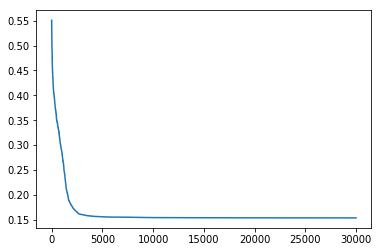

In [588]:
palgo=PocketAlgorithm(alpha=0.01, niter=5)
palgo.train(Xtrain, Ttrain)
palgo.errorplot()

output the evaluation results on the Test data with a binary cutoff threshold of 0.5

Precision:	0.997474747475
Recall:	0.956416464891
Specificity:	0.947368421053
FPR:	0.00166389351082

F1 Score:	0.97651421508
MCC Score:	5.4078134743


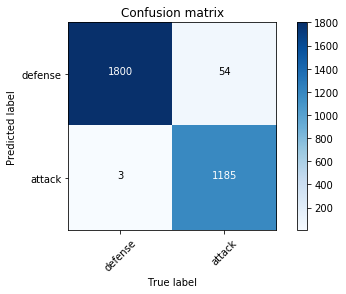

In [589]:
evaluation_metrics(palgo.use(Xtest, threshold=0.5), Ttest)

Plot the ROC-AUC of the model

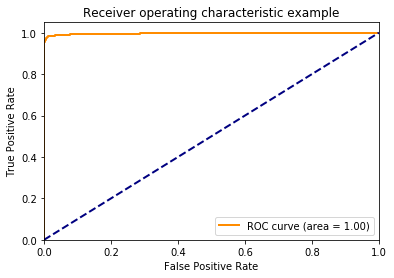

In [565]:
palgo.roc_auc(T=Ttest, X=Xtest)

**Next** lets look how the training data with only 2 features perform

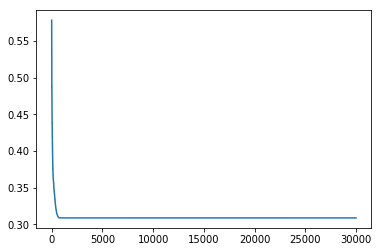

In [566]:
palgo_2f=PocketAlgorithm(alpha=0.01, niter=5)
palgo_2f.train(Xtrain_2f, Ttrain)
palgo_2f.errorplot()

Precision:	0.914285714286
Recall:	0.800645682002
Specificity:	0.726470588235
FPR:	0.0515806988353

F1 Score:	0.853700516351
MCC Score:	1.76929860414


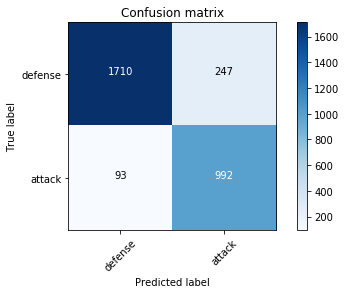

In [568]:
evaluation_metrics(palgo_2f.use(Xtest_2f, threshold=0.5), Ttest)

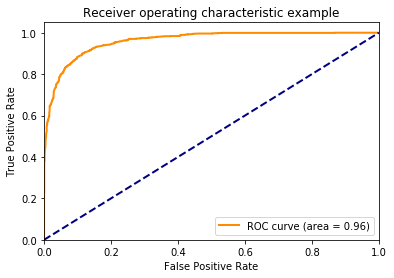

In [570]:
palgo_2f.roc_auc(T=Ttest, X=Xtest_2f)

Finally, we plot out the boundaries of using only the two features

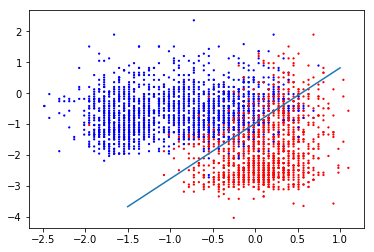

In [658]:
test=palgo_2f.normalize(Xtest_2f)
plt.scatter(test[:,0],test[:,1], c=col[6000:], s=1.5)
xt = np.array([-1.5, 1])
yt = (palgo_2f.wp[0]+palgo_2f.wp[1] * xt - 0.5 )/ -palgo_2f.wp[2]
plt.plot(xt, yt)

Overall, using only positioning and aggression yields reasonably good results though not on par with the model that uses all the features. We then look at the ROC curve, and the auc is 0.96, which still indicates that the model is a good predictor.

### QDA
Then we use the QDA method to learn the boundaries

In [537]:
qda=QDA()
qda.train(Xtrain, Ttrain)

Precision:	0.979935794543
Recall:	0.985472154964
Specificity:	0.418604651163
FPR:	0.0138657792568

F1 Score:	0.982696177062
MCC Score:	6.28601366506


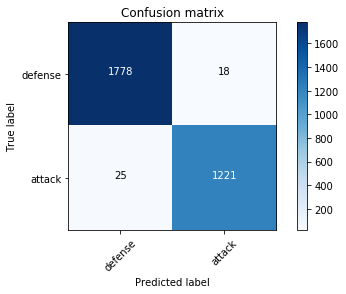

In [572]:
evaluation_metrics(qda.use(Xtest), Ttest)

/Users/syc042813/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


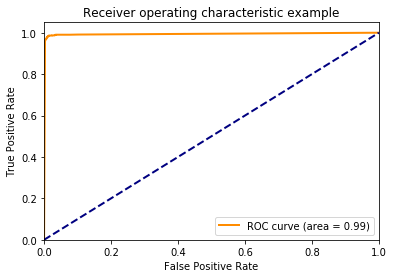

In [538]:
qda.roc_auc(T=Ttest, X=Xtest)

In [659]:
qda_2f=QDA()
qda_2f.train(Xtrain_2f, Ttrain)

Precision:	0.937881873727
Recall:	0.743341404358
Specificity:	0.839050131926
FPR:	0.0338325013866

F1 Score:	0.82935614588
MCC Score:	1.62622364087


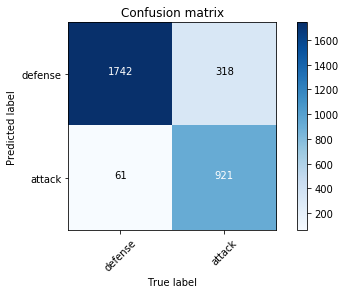

In [661]:
evaluation_metrics(qda_2f.use(Xtest_2f), Ttest)

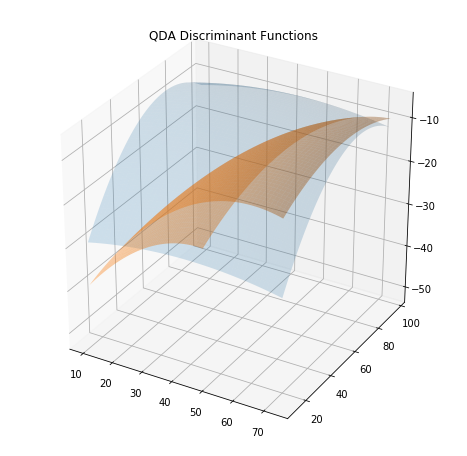

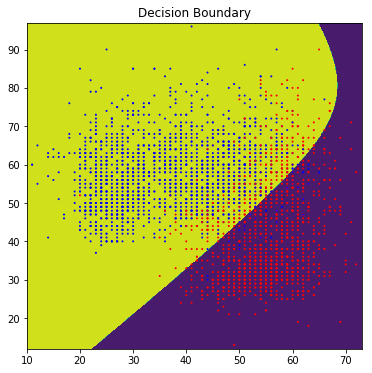

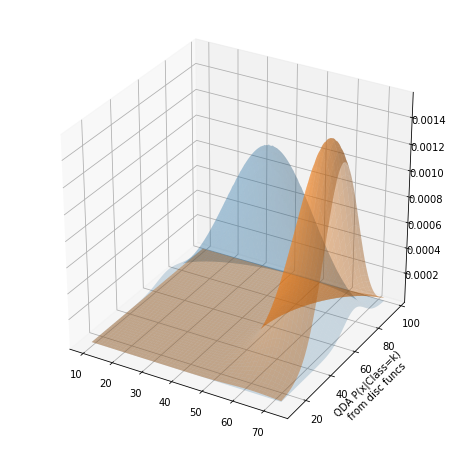

In [464]:
qda_2f.plots(X=Xtest_2f, T=Ttest, color=COLOR[6000:])

The 2 feature model produced relatively good results like the LMS Pocket algorithm model, but still cannot compare with the full feature model. QDA on full features generated the best results yet.

### LDA

Next we train the LDA algorithm and see if it measures better against the QDA algorithm.

First train the model

In [583]:
lda=LDA()
lda.train(Xtrain, Ttrain)

Then output the evaluation metrics

Precision:	1.0
Recall:	0.890234059726
Specificity:	1.0
FPR:	0.0

F1 Score:	0.941929974381
MCC Score:	3.31275616624


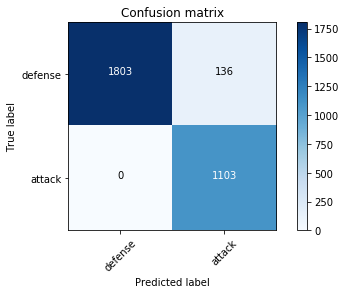

In [584]:
evaluation_metrics(lda.use(Xtest), Ttest)

Plot out the roc auc curve by varying the prior probability

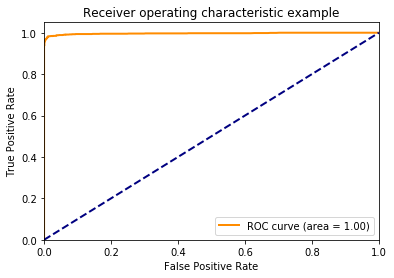

In [535]:
lda.roc_auc(T=Ttest, X=Xtest)

**Next** we look at how the two feature model performs

First train the model

In [581]:
lda_2f=LDA()
lda_2f.train(Xtrain_2f, Ttrain)

Then output the evaluation metrics

Precision:	0.956367924528
Recall:	0.654560129136
Specificity:	0.920430107527
FPR:	0.0205213533001

F1 Score:	0.77719214183
MCC Score:	1.3680579195


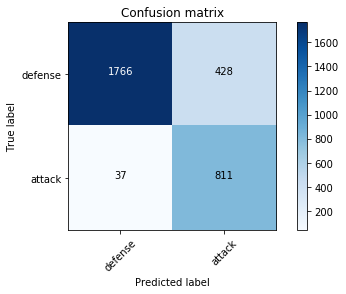

In [580]:
evaluation_metrics(lda_2f.use(Xtest_2f), Ttest)

Plot out the roc auc curve by varying the prior probability

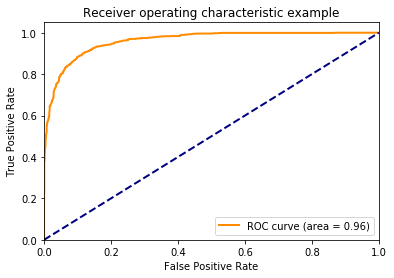

In [579]:
lda_2f.roc_auc(T=Ttest, X=Xtest_2f)

Finally plot out the boundary and distribution plots for the 2-feature model for LDA

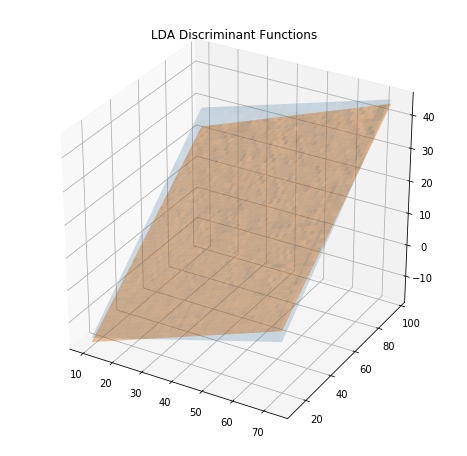

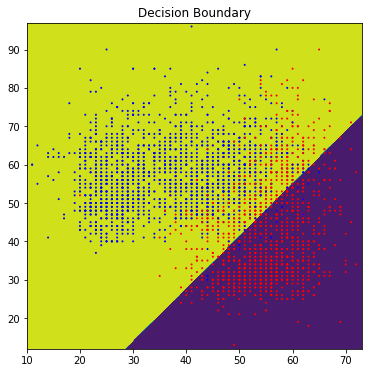

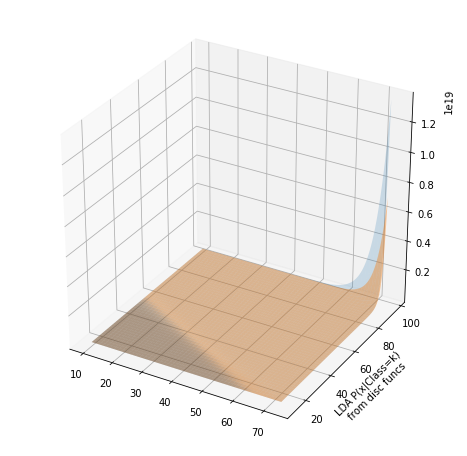

In [474]:
lda_2f.plots(Xtest_2f, Ttest,color=COLOR[6000:] )

The 2 feature model produced relatively good results like before, but still cannot compare with the full feature model. The ROC-AUC curves were the same as the QDA results. 

### LOGISTIC REGRESSION

Logistic Regression was performed on the full featured data (lr = 0.01) and the 2-featured (lr = 0.001) data using the following configurations:

1. Logistic regression 5 iterations
2. Logistic regression 600 iterations
3. Logistic regression with pocket algorithm and size 1 batch training for 5 iterations.


**ON THE FULL FEATURED DATA**

Logistic regression with lr = 0.01 and only 5 iterations

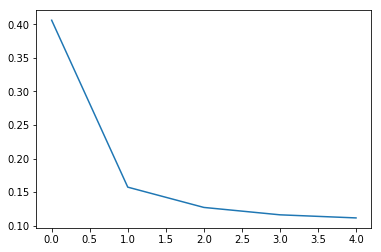

In [596]:
lgr_f5=LogisticRegression(alpha=0.01, niter=5)
lgr_f5.train(Xtrain, Ttrain)
lgr_f5.errorplot()

Precision:	0.914781297134
Recall:	0.979015334948
Specificity:	0.187050359712
FPR:	0.0626733222407

F1 Score:	0.945808966862
MCC Score:	3.27002576596


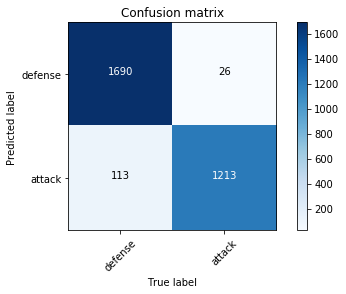

In [597]:
evaluation_metrics(lgr_f5.use(Xtest, threshold=0.5), Ttest)

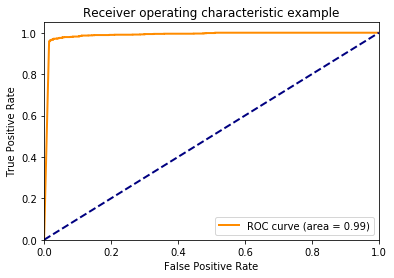

In [598]:
lgr_f5.roc_auc(T=Ttest, X=Xtest)

Logistic regression with lr = 0.01 and 600 iterations

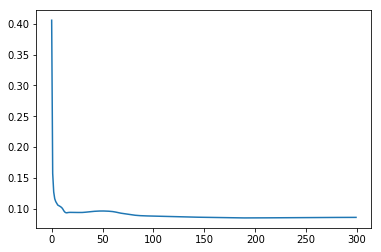

In [633]:
lgr=LogisticRegression(alpha=0.01, niter=300)
lgr.train(Xtrain, Ttrain)
lgr.errorplot()

Precision:	0.971223021583
Recall:	0.980629539952
Specificity:	0.4
FPR:	0.0199667221298

F1 Score:	0.975903614458
MCC Score:	5.25835967425


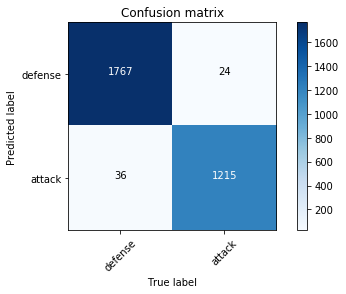

In [634]:
evaluation_metrics(lgr.use(Xtest, threshold=0.5), Ttest)

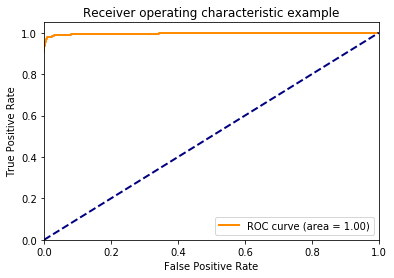

In [635]:
lgr.roc_auc(T=Ttest, X=Xtest)

Logistic regression with pocket algorithm and batch training for 5 iterations and lr = 0.01

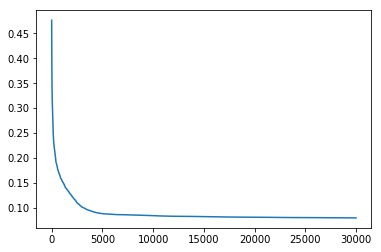

In [603]:
lgr_p=LogisticRegression(alpha=0.01, niter=5)
lgr_p.train(Xtrain, Ttrain, pocket=True)
lgr_p.errorplot()

Precision:	0.990082644628
Recall:	0.966908797417
Specificity:	0.77358490566
FPR:	0.00665557404326

F1 Score:	0.978358513679
MCC Score:	5.62242665791


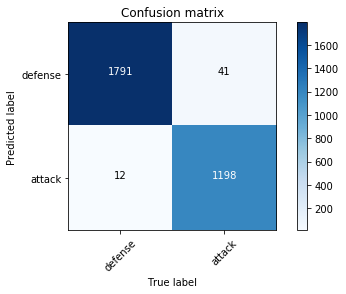

In [654]:
evaluation_metrics(lgr_p.use(Xtest, threshold=0.5), Ttest)

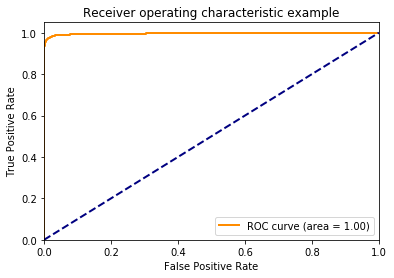

In [486]:
lgr_p.roc_auc(T=Ttest, X=Xtest)

**ON THE  2-FEATURED DATA**

Logistic regression with lr = 0.002 and 5 iterations

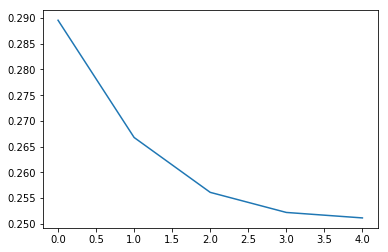

In [631]:
lgr_2f5=LogisticRegression(alpha=0.002, niter=5)
lgr_2f5.train(Xtrain_2f, Ttrain)
lgr_2f5.errorplot()

Precision:	0.955555555556
Recall:	0.555286521388
Specificity:	0.945111492281
FPR:	0.0177481974487

F1 Score:	0.702399183257
MCC Score:	1.09272072319


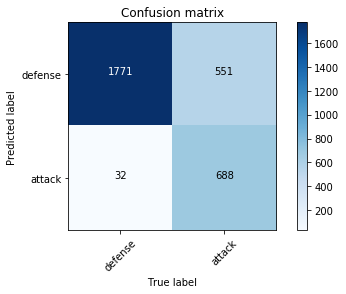

In [655]:
evaluation_metrics(lgr_2f5.use(Xtest_2f, threshold=0.5), Ttest)

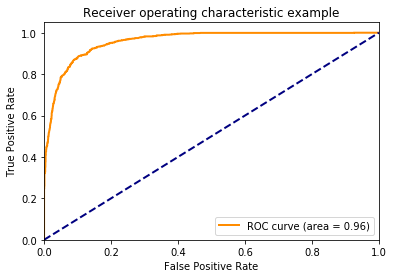

In [611]:
lgr_2f5.roc_auc(T=Ttest, X=Xtest_2f)

Logistic regression with lr = 0.002 and 600 iterations

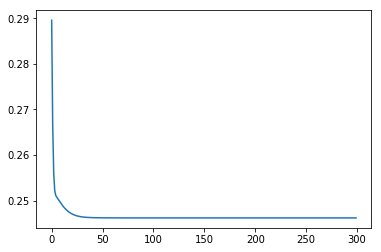

In [629]:
lgr_2f=LogisticRegression(alpha=0.002, niter=300)
lgr_2f.train(Xtrain_2f, Ttrain)
lgr_2f.errorplot()

Precision:	0.954666666667
Recall:	0.577885391445
Specificity:	0.938958707361
FPR:	0.0188574597892

F1 Score:	0.719959778783
MCC Score:	1.14656677257


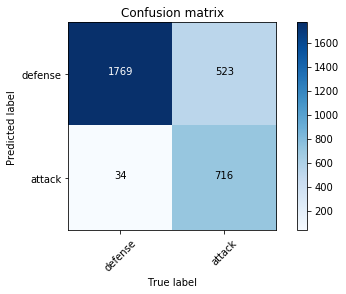

In [656]:
evaluation_metrics(lgr_2f.use(Xtest_2f, threshold=0.5), Ttest)

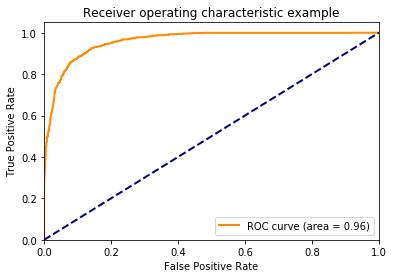

In [623]:
lgr_2f.roc_auc(T=Ttest, X=Xtest_2f)

Pocket version of Logistic regression with lr = 0.002 and 5 iterations

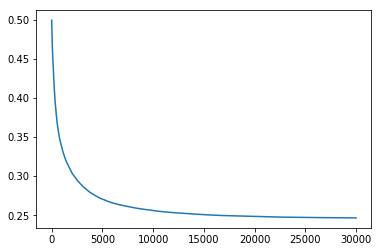

In [622]:
lgr_2fp=LogisticRegression(alpha=0.002, niter=5)
lgr_2fp.train(Xtrain_2f, Ttrain, pocket=True)
lgr_2fp.errorplot()

Precision:	0.955555555556
Recall:	0.589991928975
Specificity:	0.937269372694
FPR:	0.0188574597892

F1 Score:	0.729540918164
MCC Score:	1.17966277531


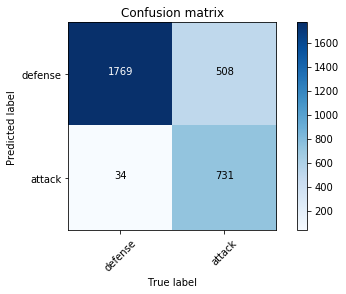

In [657]:
evaluation_metrics(lgr_2fp.use(Xtest_2f, threshold=0.5), Ttest)

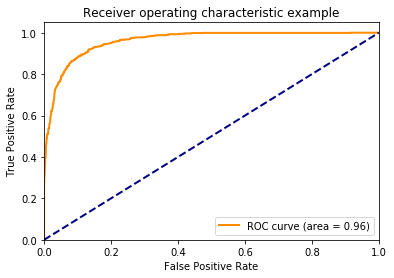

In [637]:
lgr_2fp.roc_auc(T=Ttest, X=Xtest_2f)

A boundary plot using the 2-feature model that trained for 300 iterations

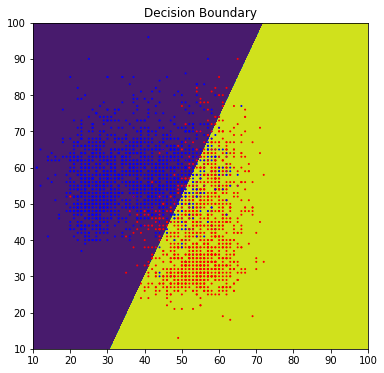

In [644]:
x = np.linspace(10, 100, 1000)
y = np.linspace(10, 100, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T

Y = lgr_2f.use(X, threshold=0.1)


plt.figure(figsize=(6,6))
plt.contourf(xs, ys, Y.reshape(xs.shape))
plt.title("Decision Boundary")

plt.scatter(Xtest_2f[:, 0], Xtest_2f[:, 1], c=COLOR[6000:], s=1)


After much comparison, there seem to be only minimal difference in the result of the configurations. Utilizing all the features for prediction yielded much more accurate results than only using the two feature model, the ROC-AUC for using all features was 1 while for the 2 feature model it was 0.96. Other evaluation metrics tells a similar story. However, the evaluation metrics depend much on the threshold cutoff that is selected, which was 0.5 for all the tests, varying the cutoff yielded significantly different results for the 2-feature model. 

### DISCUSSIONS

In terms of performance, QDA performed best on both the full feature testing data and the 2 featured testing data, with ROC-AUC results on par with the other methods and significantly higher MCC and slightly higher F1 scores. This could be because QDA is non-linear, thus its boundaries can fit the true boundaries better. However, the results of logistic regression aren't far behind. Furthermore, by adjusting the cutoff threshold for logistic regression and LMS pocket algorithm it is possible to achieve even better results, however that would be a very time consuming task of paramter tweaking. 

# Conclusions

Upon tweaking and playing around with the 4 different classifiers, it is quite evident that by comparing across all the evaluation metrics, QDA produces the best results with the highest MCC score and F1 score. I believe this is because of the non-linear nature of QDA. Following close behind is the results of logistic regression. Overall, the 2-feature model consistently performed worse than the full-featured model, which is to be expected. Also, increasing training iteration to an extent helped to increase the model predictions.

# References

1. http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
2. http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html


# Extra Credit

Search for a ordinal data set and apply your classifiers to it. 
Repeat the experiments on it. 
Do you have different observation from previous results? 
Were you able to observe that we discussed in class about logistic regression? 
For a full extra credit point, you need to discuss all bullet points in Results section.     

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |References
5 | |Grammar and spelling error (Proofread please)